# Case 6

Clustered points will provide a worse fit then homogeneous spread points.

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, time
from tqdm import tqdm
import random

#import package
sys.path.extend(os.path.join(os.getcwd(),'Point_Geometry_Package'))

from Point_Geometry_Package.get_random_subsamples import get_random_subsamples
from Point_Geometry_Package.simulate_sinkhole_parameter_retrieval2 import simulate_sinkhole

In [2]:
def create_clustered_dataset(num_r,r_filt):
    # Point on a circle with the same r
    R_circ = 600
    n_circ = 360
    theta = np.deg2rad(np.linspace(0,360,n_circ))
#     num_r = 150 #this will influence the number of points generated
    r_array_circ = np.linspace(r_filt,R_circ,num_r)

    #total number of points is nxn

    x_circ = np.array([])
    y_circ = np.array([])
    z_circ = np.array([])
    r_circ = np.array([])

    for item in r_array_circ:
        x_item = item*np.cos(theta)
        y_item = item*np.sin(theta)
        idx = random.sample(range(0,len(x_item)),1)
        x_circ = np.concatenate((x_circ,x_item[idx]))
        y_circ = np.concatenate((y_circ,y_item[idx]))
        r = np.sqrt((x_item**2)+(y_item**2))
        r_circ = np.concatenate((r_circ,r[idx]))
    #     z_circ = np.concatenate((z_circ,zg(R_circ,r)[idx]))
    
    return x_circ, y_circ, r_circ

In [3]:
x_circ, y_circ, r_circ = create_clustered_dataset(1000,0)

# filter coordinates (200,300) with r=50
x_filter = 200
y_filter = 300
r_filter = 200

idx_filter = []

for px,py in zip(x_circ,y_circ):
    if px < x_filter+r_filter and px > x_filter - r_filter and py < y_filter + r_filter and py > y_filter - r_filter:
        idx_filter.append(True)
    else:
        idx_filter.append(False)

#square area
# filter coordinates
x_filter = -300
y_filter = 0
r_filter = 100
idx_filter2 = []
for px,py in zip(x_circ,y_circ):
    if px < x_filter+r_filter and px > x_filter - r_filter and py < y_filter + r_filter*4 and py > y_filter - r_filter*4:
        idx_filter2.append(True)
    else:
        idx_filter2.append(False)    
    
idx_filter = np.array(idx_filter)
idx_filter2 = np.array(idx_filter2)

#subsample dataset to dataset with the lowest amount of point
points_case1 = sum(idx_filter)
points_case2 = sum(idx_filter2)

num_points = min(points_case1,points_case2)

#start the subsampling
#case 1
x_case1 = x_circ[idx_filter]
y_case1 = y_circ[idx_filter]

idx_case1 = random.sample(range(0,len(x_case1)),num_points)

x_case1 = x_case1[idx_case1]
y_case1 = y_case1[idx_case1]

#case 2
x_case2 = x_circ[idx_filter2]
y_case2 = y_circ[idx_filter2]

idx_case2 = random.sample(range(0,len(x_case2)),num_points)

x_case2 = x_case2[idx_case2]
y_case2 = y_case2[idx_case2]

#overall dataset corrected
x_circ, y_circ, r_circ = create_clustered_dataset(num_points,0)

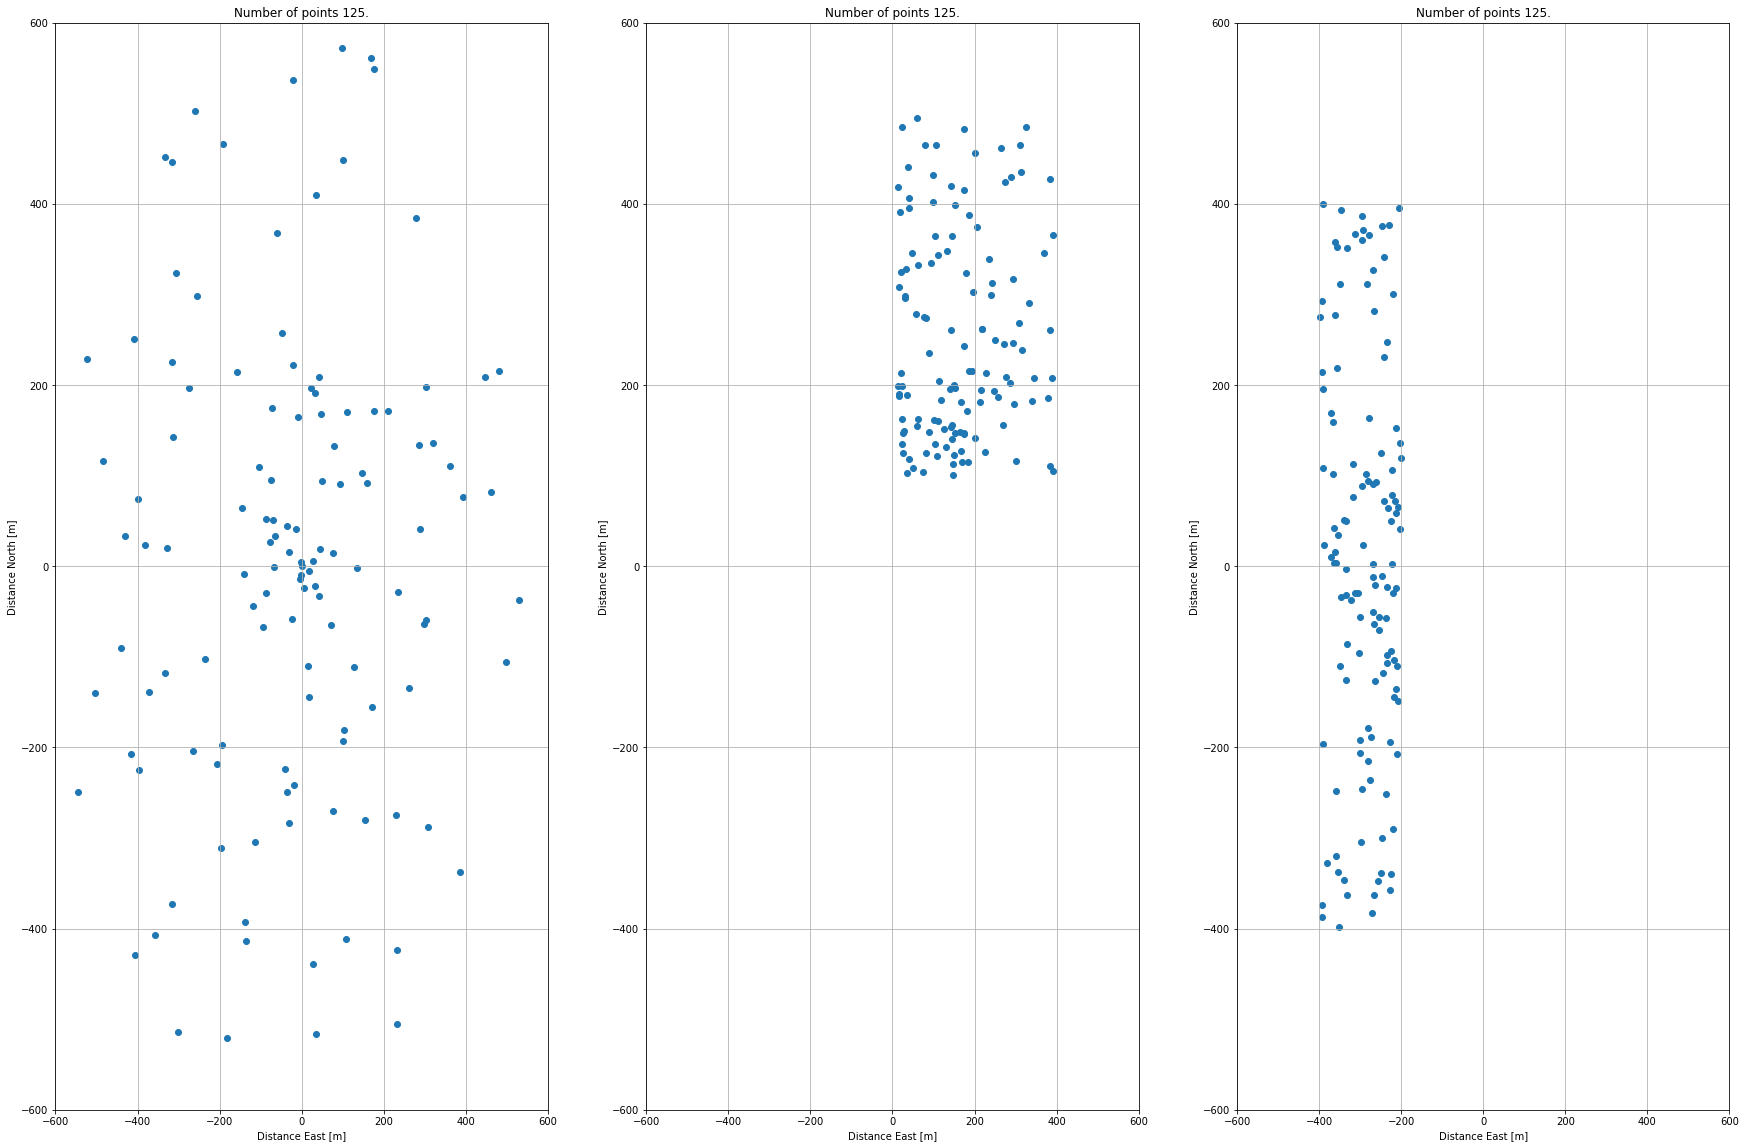

In [4]:
fig, ax = plt.subplots(ncols=3,figsize=(30,20))

ax[0].scatter(x_circ,y_circ)

ax[0].set_title(f'Number of points {len(x_circ)}.')
ax[0].set_ylabel('Distance North [m]')
ax[0].set_xlabel('Distance East [m]')

ax[0].set_ylim(-600,600)
ax[0].set_xlim(-600,600)
ax[0].grid(True)

ax[1].scatter(x_case1,y_case1)

ax[1].set_title(f'Number of points {len(x_case1)}.')
ax[1].set_ylabel('Distance North [m]')
ax[1].set_xlabel('Distance East [m]')

ax[1].set_ylim(-600,600)
ax[1].set_xlim(-600,600)
ax[1].grid(True)

ax[2].scatter(x_case2,y_case2)

ax[2].set_title(f'Number of points {len(x_case2)}.')
ax[2].set_ylabel('Distance North [m]')
ax[2].set_xlabel('Distance East [m]')

ax[2].set_ylim(-600,600)
ax[2].set_xlim(-600,600)
ax[2].grid(True)

In [5]:
x0 = 0
y0 = 0

max_subs = 100
n_sims = 100

In [7]:
obj_circ = simulate_sinkhole()
obj_circ.x0 = x0
obj_circ.y0 = y0
obj_circ.max_subs = max_subs
obj_circ.n_sims = n_sims
obj_circ.x_unravel = x_circ
obj_circ.y_unravel = y_circ

obj_circ.simulate_sinkhole_parameter_retrieval()

Simulating:   0%|                                                                              | 0/100 [00:00<?, ?it/s]H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:64: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:47: RuntimeWarning: overflow encountered in double_scalars
  A2 = ((2*v*t*np.pi*r**2)/(R**3))*zg(R,r)
Simulating:  51%|███████████████████████████████████▏                                 | 51/100 [01:58<01:52,  2.30s/it]H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:55: RuntimeWarning: invalid value encountered in matmul
  dx = Qxhat @ J.T @ invQyy @ dy
Simu

In [8]:
obj_case1 = simulate_sinkhole()
obj_case1.x0 = x0
obj_case1.y0 = y0
obj_case1.max_subs = max_subs
obj_case1.n_sims = n_sims
obj_case1.x_unravel = x_case1
obj_case1.y_unravel = y_case1

obj_case1.simulate_sinkhole_parameter_retrieval()

Simulating:  18%|████████████▍                                                        | 18/100 [00:44<03:17,  2.40s/it]H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:64: RuntimeWarning: invalid value encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\zg.py:10: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-np.pi*(r**2/R**2))
Simulating: 100%|████████████████████████████████████████████████████████████████████| 100/100 [04:02<00:00,  2.42s/it]


In [9]:
obj_case2 = simulate_sinkhole()
obj_case2.x0 = x0
obj_case2.y0 = y0
obj_case2.max_subs = max_subs
obj_case2.n_sims = n_sims
obj_case2.x_unravel = x_case2
obj_case2.y_unravel = y_case2

obj_case2.simulate_sinkhole_parameter_retrieval()

Simulating: 100%|████████████████████████████████████████████████████████████████████| 100/100 [04:07<00:00,  2.48s/it]


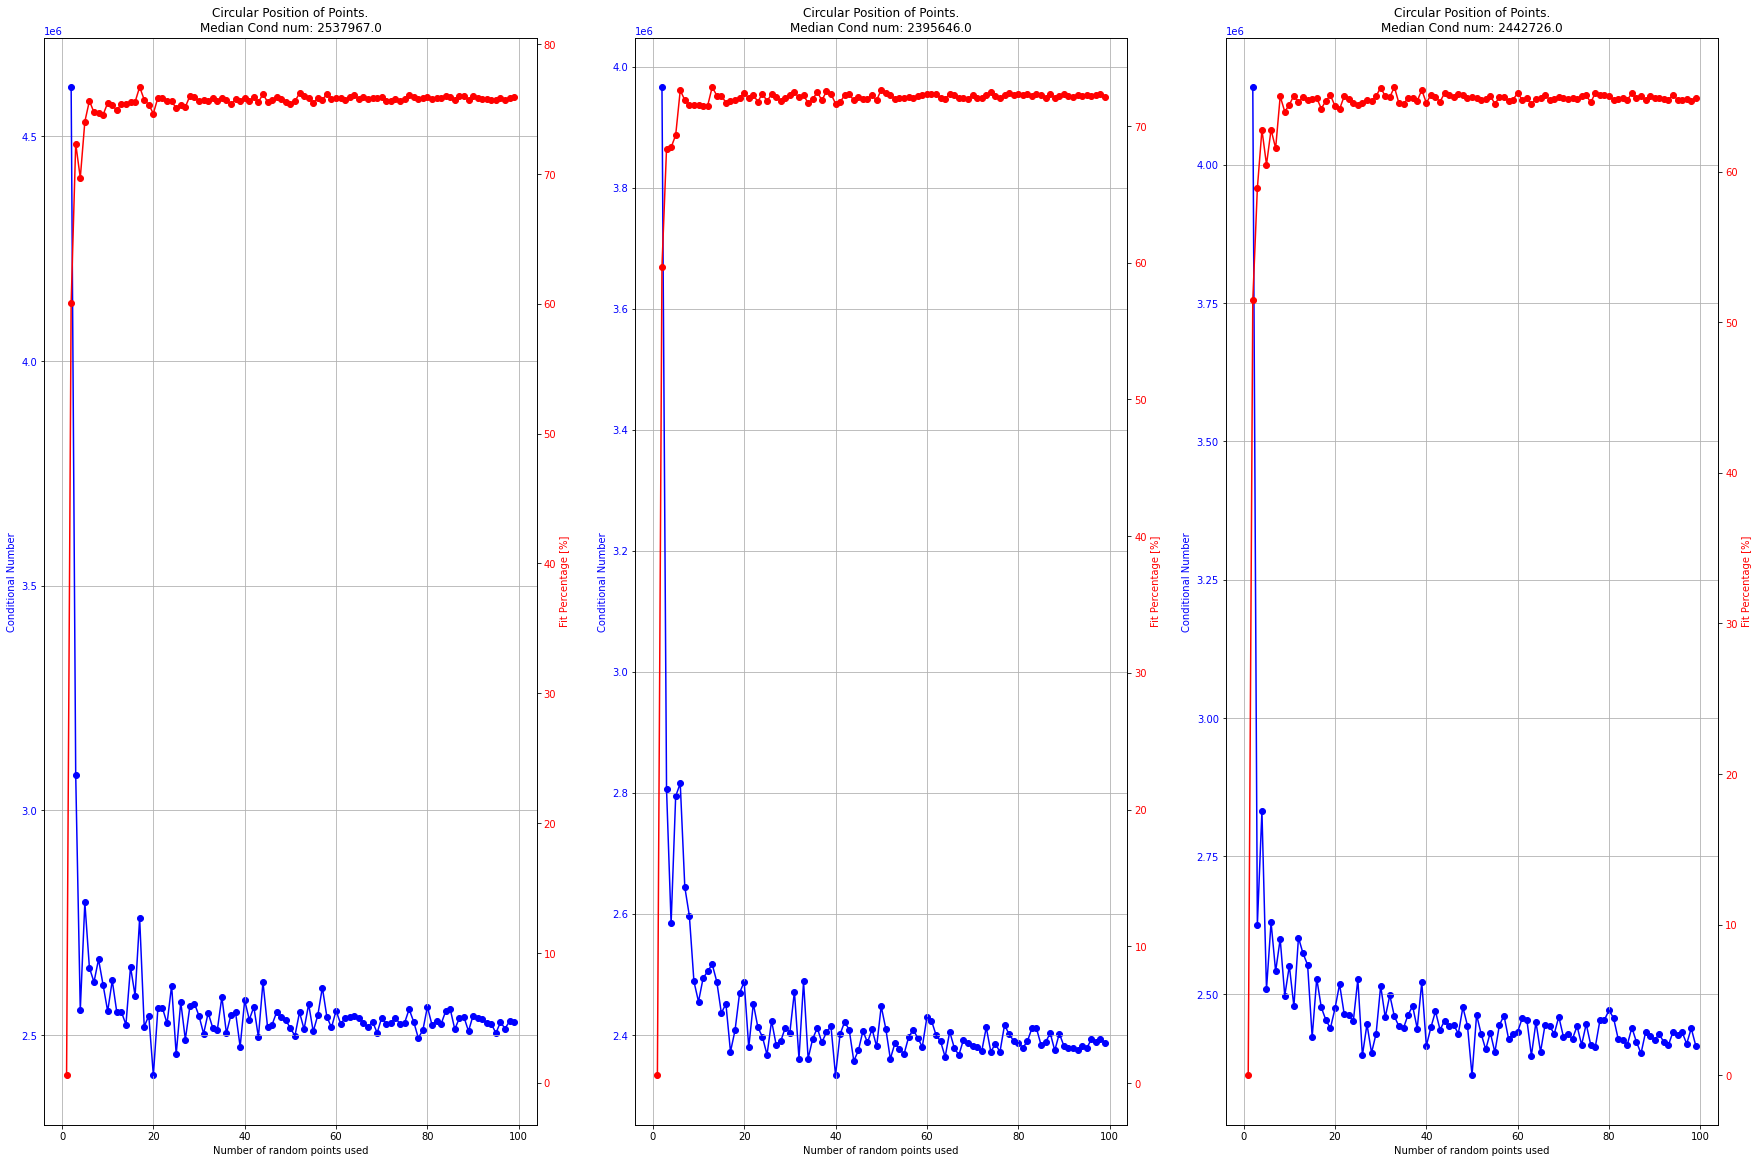

In [14]:
fig , ax = plt.subplots(ncols=3, figsize=(30,20))

#subcase 1
avg_cond_line1 = np.median(obj_circ.cond_number_total_save,axis=0)
avg_data_line1 = np.sum(obj_circ.fit_total_save,axis=0)/n_sims

ax[0].plot(obj_circ.number_subs[1:],avg_cond_line1[1:],c='b',label='Conditional Number')
ax[0].scatter(obj_circ.number_subs[1:],avg_cond_line1[1:],c='b')
# ax1.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax[0].set_title(f'Circular Position of Points.' + '\n' + f'Median Cond num: {np.round(np.median(avg_cond_line1[1:]))}')
ax[0].set_ylabel('Conditional Number',color='b')
ax[0].set_xlabel('Number of random points used')
ax[0].tick_params(axis='y', labelcolor='b')

ax2 = ax[0].twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj_circ.number_subs,avg_data_line1,c='r',label='Model Fit')
ax2.scatter(obj_circ.number_subs,avg_data_line1,c='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[0].grid(True)

#subcase 2
avg_cond_line2 = np.median(obj_case1.cond_number_total_save,axis=0)
avg_data_line2 = np.sum(obj_case1.fit_total_save,axis=0)/obj_case1.n_sims

ax[1].plot(obj_case1.number_subs[1:],avg_cond_line2[1:],c='b',label='Conditional Number')
ax[1].scatter(obj_case1.number_subs[1:],avg_cond_line2[1:],c='b')
# ax1.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax[1].set_title(f'Circular Position of Points.' + '\n' + f'Median Cond num: {np.round(np.median(avg_cond_line2[1:]))}')
ax[1].set_ylabel('Conditional Number',color='b')
ax[1].set_xlabel('Number of random points used')
ax[1].tick_params(axis='y', labelcolor='b')

ax2 = ax[1].twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj_case1.number_subs,avg_data_line2,c='r',label='Model Fit')
ax2.scatter(obj_case1.number_subs,avg_data_line2,c='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[1].grid(True)

#subcase 3
avg_cond_line3 = np.median(obj_case2.cond_number_total_save,axis=0)
avg_data_line3 = np.sum(obj_case2.fit_total_save,axis=0)/n_sims

ax[2].plot(obj_case2.number_subs[1:],avg_cond_line3[1:],c='b',label='Conditional Number')
ax[2].scatter(obj_case2.number_subs[1:],avg_cond_line3[1:],c='b')
# ax1.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax[2].set_title(f'Circular Position of Points.' + '\n' + f'Median Cond num: {np.round(np.median(avg_cond_line3[1:]))}')
ax[2].set_ylabel('Conditional Number',color='b')
ax[2].set_xlabel('Number of random points used')
ax[2].tick_params(axis='y', labelcolor='b')

ax2 = ax[2].twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj_case2.number_subs,avg_data_line3,c='r',label='Model Fit')
ax2.scatter(obj_case2.number_subs,avg_data_line3,c='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[2].grid(True)

# Conclusions
- The distribution of different distance towards the center is the most important factor for determining the fit and the Condition number